In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("../corpus/corpus_russia_gas.csv")
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.sort_values(by=['date', 'time'])
df_cleaned = df.drop_duplicates(subset='body', keep='first')

In [56]:
df_cleaned

uri lang  isDuplicate        date      time  \
85          8112677711  eng        False  2024-05-05  18:26:38   
134  2024-05-350289724  eng        False  2024-05-09  13:32:21   
80   2024-05-350784938  eng        False  2024-05-09  23:52:58   
140         8124211594  eng        False  2024-05-12  23:10:48   
139  2024-05-354220356  eng        False  2024-05-13  12:39:46   
..                 ...  ...          ...         ...       ...   
93   2024-05-372492253  eng        False  2024-05-29  19:11:03   
130         8153032657  eng         True  2024-05-30  09:22:46   
1    2024-05-373661108  eng        False  2024-05-30  18:51:16   
149  2024-05-373709192  eng        False  2024-05-30  20:03:09   
0           8154703126  eng        False  2024-05-31  08:09:55   

                 dateTime           dateTimePub dataType  sim  \
85   2024-05-05T18:26:38Z  2024-05-05T18:26:06Z     news  0.0   
134  2024-05-09T13:32:21Z  2024-05-09T13:22:47Z     news  0.0   
80   2024-05-09T23:52:58Z  2024-05-09T23:25:31Z     news  0.0   
140  2024-05-12T23:10:48Z  2024-05-12T23:10:06Z     news  0.0   
139  2024-05-13T12:39:46Z  2024-05-13T12:20:56Z     news  0.0   
..                    ...                   ...      ...  ...   
93   2024-05-29T19:11:03Z  2024-05-29T17:29:00Z     news  0.0   
130  2024-05-30T09:22:46Z  2024-05-30T08:55:27Z     news  0.0   
1    2024-05-30T18:51:16Z  2024-05-30T18:51:03Z     news  0.0   
149  2024-05-30T20:03:09Z  2024-05-30T19:56:55Z     news  0.0   
0    2024-05-31T08:09:55Z  2024-05-31T08:09:13Z     news  0.0   

                                                   url  ...  \
85   https://www.wnd.com/2024/05/winning-ukraine-re...  ...   
134  https://en.interfax.com.ua/news/press-release/...  ...   
80   https://balloon-juice.com/2024/05/09/war-for-u...  ...   
140  https://www.globalsecurity.org/military/world/...  ...   
139  https://therussophile.org/how-a-billionaire-co...  ...   
..                                                 ...  ...   
93   https://www.barrons.com/news/international-7-d...  ...   
130  https://www.globalsecurity.org/wmd/library/new...  ...   
1    https://carnegieendowment.org/research/2024/05...  ...   
149  https://www.cbssports.com/soccer/news/euro-202...  ...   
0    https://www.orfonline.org/research/us-russia-r...  ...   

                source_uri source_dataType  \
85                 wnd.com            news   
134     en.interfax.com.ua            news   
80       balloon-juice.com            news   
140     globalsecurity.org            news   
139      therussophile.org            news   
..                     ...             ...   
93             barrons.com            news   
130     globalsecurity.org            news   
1    carnegieendowment.org            news   
149          cbssports.com            news   
0            orfonline.org            news   

                                   source_title               authors  \
85                                          WND                   NaN   
134                            Interfax-Ukraine                   NaN   
80                                Balloon Juice      Adam L Silverman   
140                          GlobalSecurity.org             John Pike   
139                              TheRussophiles       Jeremy Kuzmarov   
..                                          ...                   ...   
93                                      Barrons  Agence France-Presse   
130                          GlobalSecurity.org             John Pike   
1    Carnegie Endowment for International Peace                   NaN   
149                                  CBS Sports           Chuck Booth   
0                                           ORF                   NaN   

    sentiment        wgt  relevance  \
85   0.192157  452629598          5   
134  0.631373  452957541         11   
80   0.090196  452994778          5   
140 -0.152941  453251448         26   
139 -0.537255  453299986          4   
..        ...        ...

In [57]:
t = df_cleaned['datetime'].tolist()
sentiment = df_cleaned['sentiment'].tolist()
relevance = df_cleaned['relevance'].tolist()

In [58]:
# Creation de la ligne des hausses/baisses
n = len(t)
hausse = [-(sentiment[k]*2 - 1) * relevance[k] for k in range(0, n)]

In [59]:
# Creation de la serie de valeurs
valeurs = [hausse[0]]
for k in range(1, n) :
    valeurs.append(valeurs[k-1] + hausse[k])
valeurs

[3.0784313725490198,
 0.18823529411764772,
 4.286274509803924,
 38.239215686274505,
 46.53725490196078,
 48.42745098039215,
 53.54509803921568,
 68.2235294117647,
 100.15294117647059,
 103.05490196078432,
 104.71372549019608,
 105.50196078431372,
 126.26666666666667,
 179.10980392156864,
 181.33333333333334,
 181.60392156862747,
 187.44705882352943,
 191.78823529411767,
 199.18039215686278,
 205.80784313725493,
 206.47058823529414,
 219.77254901960788,
 223.10588235294122,
 223.6274509803922,
 224.1490196078432,
 224.7333333333334,
 225.2549019607844,
 230.5843137254903,
 231.46666666666675,
 238.1372549019609,
 240.21960784313737,
 242.95686274509816,
 243.46274509803933,
 244.65882352941188,
 245.9529411764707,
 247.30980392156872,
 249.34509803921577,
 250.0235294117648,
 252.7921568627452,
 256.886274509804,
 259.62745098039227,
 260.58823529411774,
 263.10588235294125,
 271.67450980392164,
 273.7843137254903,
 275.53725490196086,
 279.5137254901962,
 281.286274509804,
 282.1098039

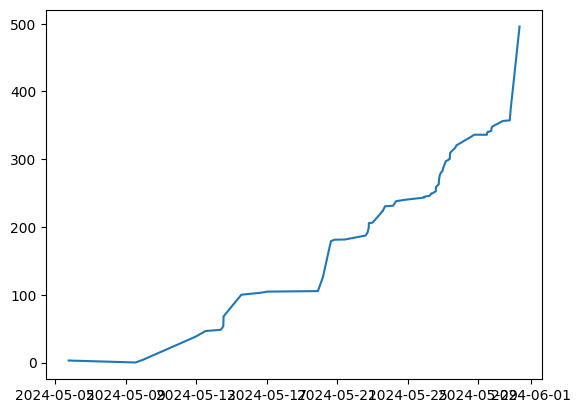

In [60]:
# Affichage 
plt.plot(t, valeurs, linestyle='-')